In [40]:
import pandas as pd
import pingouin as pg

In [129]:
df = pd.DataFrame({'group':[ 'A' if i % 2 == 0 else 'B' for i in range(100)], 'values':[1 if i % 4 == 0 else 0 for i in range(100)]})

In [96]:
df = pd.DataFrame({'group':[ 'A' if i % 2 == 0 else 'B' for i in range(100)], 'values':['1,0' if i % 4 == 0 else '0,0' for i in range(100)]})

In [100]:
df = pd.DataFrame({'group':[ 'A' if i % 2 == 0 else 'B' for i in range(100)], 'values':[1 for i in range(100)]})

In [132]:
df = pd.DataFrame({'group':[ 'A' if i % 2 == 0 else 'B' for i in range(100)], 'values':[i for i in range(100)]})

In [134]:
df.to_csv('test_df_4.csv', index=False)

In [98]:
df = pd.read_csv('test_df.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'test_df.csv'

In [6]:
df

,group,values
0,A,1
1,B,0
2,A,0
3,B,0
4,A,1
...,...,...
95,B,0
96,A,1
97,B,0
98,A,0


In [82]:
url='https://drive.google.com/file/d/18vV4xeEZeJbTcgpz4zPqCtl30-finfnl/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)

In [45]:
df.dtypes

group     object
values     int64
dtype: object

In [21]:
a = '2'
a.isdigit()

True

In [22]:
def a():
    return 1, '2'

In [29]:
test = a()

In [32]:
test[1]

'2'

In [35]:
pd.DataFrame().shape

(0, 0)

In [41]:
_, _, stats = pg.chi2_independence(df, x='group', y='values')

C:\ProgramData\Anaconda3\envs\pythonProject4\lib\site-packages\pingouin\contingency.py:150: UserWarning: Low count on observed frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))


In [44]:
stats['pval'][0]

2.980768140451168e-08

In [47]:
df['values'].dtype

dtype('int64')

In [48]:
df['values'].dtype == 'O'

False

In [49]:
df['values'].nunique() > 2

False

In [78]:
def clear_data(df: pd.DataFrame, column_group: str, column_value: str):
    """
    :param df: DataFrame
    :param column_group: name column with group
    :param column_value: name column with value
    :return: clear DataFrame
    """
    message = ''
#   fix types
    if df[column_group].nunique() > 2:
        message = f'Ошибка в данных: значений в стобце {column_group} больше 2.1'
        return pd.DataFrame(), message
    elif df[column_group].nunique() < 2:
        message = f'Ошибка в данных: значений в столбце {column_group} меньше 2.2'
        return pd.DataFrame(), message

    if df[column_value].dtype == 'O':
        try:
            df[column_value] = df[column_value].dropna().apply(lambda x: x.replace(',', '.'))
            df[column_value] = df[column_value].astype('float')
        except:
            message = f'Ошибка в записе данных: значения столбца {column_value} имеют неверный формат.3'
            return pd.DataFrame(), message

    elif df[column_value].dtype == 'int':
        df[column_value] = df[column_value].astype('float')
    elif df[column_value].dtype != 'float':
        print(df[column_value].dtype)
        message = f'Ошибка в типе данных: столбец {column_value} имеет неверный формат.4'
        return pd.DataFrame(), message
    # работа с пропусками
    if df[column_group].isna().sum():
        message += f"Процент пропущенных значений в столбце {column_group}" + \
                  str((df[column_group].isna().sum())/(df.shape[0]) * 100) + "%. "
        df.dropna(subset=[column_group], inplace=True)
        message += f"Из столбца {column_group} были удалены пропущенные значения. "

    if df[column_value].isna().sum():
        message += f"Процент пропущенных значений в столбце {column_value}"+ \
                   str((df[column_value].isna().sum())/(df.shape[0]) * 100) + "%. "
        # print(f"""Подскажите, что делать с пропущенными значениями в столбце {column_value}?
        # Введите (без кавычек):\n
        # 'del', если удалить\n
        # 'min', если приравнять к минимальному ({df[column_value].min()})\n
        # 'max', если приравнять к максимальному ({df[column_value].max()})\n
        # 'avg', если приравнять к среднему ({df[column_value].mean()})\n
        # 'median', если приравнять к медиане ({df[column_value].median()})""")
        # <digit>, если заменить на <digit>
        while True:
            str_val = '0'
            if str_val == 'del':
                df[column_value] = df[column_value].dropna()
                break
            elif str_val == 'min':
                df[column_value].fillna(df[column_value].min(), inplace=True)
                break
            elif str_val == 'max':
                df[column_value].fillna(df[column_value].max(), inplace=True)
                break
            elif str_val == 'avg':
                df[column_value].fillna(df[column_value].mean(), inplace=True)
                break
            elif str_val == 'median':
                df[column_value].fillna(df[column_value].median(), inplace=True)
                break
            elif str_val.isdigit():
                df[column_value].fillna(float(str_val), inplace=True)
            # print('Введено неправильное значение, давай попробуем еще раз.')
    return df, message

In [83]:
df_temp, message = clear_data(df, 'group', 'values')

int64


In [84]:
df_temp

""


In [85]:
message

'Ошибка в типе данных: столбец values имеет неверный формат.4'

In [62]:
df['values'] = df['values'].astype('float')

In [63]:
df.dtypes

group      object
values    float64
dtype: object

In [64]:
a = 'a'

In [71]:
df.dtypes

group      object
values    float64
dtype: object

In [91]:
import numpy as np

{'whiskers': [<matplotlib.lines.Line2D at 0x1de7483ef80>,
 'caps': [<matplotlib.lines.Line2D at 0x1de7483e710>,
 'boxes': [<matplotlib.lines.Line2D at 0x1de74877f10>],
 'medians': [<matplotlib.lines.Line2D at 0x1de7483d9c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1de7483dae0>],
 'means': []}

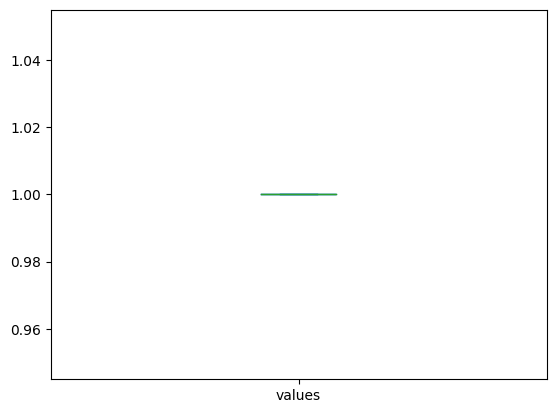

In [103]:

_, bp = df['values'].plot.box(return_type='both')


In [105]:
outliers = [flier.get_ydata() for flier in bp["fliers"]][0]

In [106]:
outliers

array([], dtype=int64)

In [119]:
list((df[df['values'] > 0.5]['values']) | (True))

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True]

In [112]:
df.quantile(0.25)['values']


C:\Temp\ipykernel_2084\3380457948.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.quantile(0.25)['values']


1.0

In [113]:
df.quantile(0.75)['values']

C:\Temp\ipykernel_2084\422529731.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.quantile(0.75)['values']


1.0

In [123]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import pandas as pd
import numpy as np
import pingouin as pg
import scipy.stats as scs
from scipy.stats import shapiro
from scipy.stats import norm
import matplotlib as plt

In [124]:
def get_bootstrap(
    data_column_1,  # числовые значения первой выборки
    data_column_2,  # числовые значения второй выборки
    boot_it=2000,  # количество бутстрап-подвыборок
    statistic=np.mean,  # интересующая нас статистика
    bootstrap_conf_level=0.95  # уровень значимости
):
    boot_data = []
    for i in range(boot_it):  # извлекаем подвыборки
        samples_1 = data_column_1.sample(
            len(data_column_1),
            replace=True  # параметр возвращения
        ).values

        samples_2 = data_column_2.sample(
            len(data_column_1),
            replace=True
        ).values

        boot_data.append(statistic(samples_1)-statistic(samples_2))  # mean() - применяем статистику

    pd_boot_data = pd.DataFrame(boot_data)

    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    quants = pd_boot_data.quantile([left_quant, right_quant])

    p_1 = norm.cdf(
        x=0,
        loc=np.mean(boot_data),
        scale=np.std(boot_data)
    )
    p_2 = norm.cdf(
        x=0,
        loc=-np.mean(boot_data),
        scale=np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2

    # Визуализация
    # _, _, bars = plt.hist(pd_boot_data[0], bins=50)
    # for bar in bars:
    #     if bar.get_x() <= quants.iloc[0][0] or bar.get_x() >= quants.iloc[1][0]:
    #         bar.set_facecolor('red')
    #     else:
    #         bar.set_facecolor('grey')
    #         bar.set_edgecolor('black')
    #
    # plt.style.use('ggplot')
    # plt.vlines(quants, ymin=0, ymax=50, linestyle='--')
    # plt.xlabel('boot_data')
    # plt.ylabel('frequency')
    # plt.title("Histogram of boot_data")
    # plt.show()

    return {"boot_data": boot_data,
            "quants": quants,
            "p_value": p_value}

In [130]:
a = get_bootstrap(
    df[df['group'] == 'A']['values'],  # числовые значения первой выборки
    df[df['group'] == 'B']['values'],  # числовые значения второй выборки
    boot_it=2000,  # количество бутстрап-подвыборок
    statistic=np.mean,  # интересующая нас статистика
    bootstrap_conf_level=0.95  # уровень значимости
)

In [131]:
a['p_value']

1.4091187774464602e-12

In [128]:
df

,group,values
0,A,1
1,B,1
2,A,1
3,B,1
4,A,1
...,...,...
95,B,1
96,A,1
97,B,1
98,A,1
